In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from environment import Environment, DirectedTree, DEFAULT, CONSTITUENT
from prouter import Router

In [23]:
def preparation_env():
    print(f"Preparing environment")
    env = Environment()
    print(f"Reading swmm-outfile")
    env.read_swmmoutfile(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.out")
    print(f"Preparing graph")
    graph = DirectedTree.from_swmm(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.inp")
    node_data = pd.read_csv(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp/pop_node_data.csv")
    node_data = node_data.set_index("NAME").to_dict(orient="index")
    graph.add_nodevalues(node_data)
    env.add_graph(graph)
    print(f"finished preparing environment")
    return env

In [24]:
print(f"Preparing environment")
start = time.time()
env = preparation_env()
print(f"{time.time() - start} sekunden")

print(f"Preparing router")
start = time.time()
print(f"{time.time() - start} sekunden")
router = Router()
router.add_environment(env)
print(f"finished preparing router")

print(f"Preparing packets")
start = time.time()
packets = router.environment.get_packets()
print(f"{time.time() - start} sekunden")

print(f"Routing packets")
start = time.time()
routetable = router.route(packets=packets)
print(f"{time.time()-start} sekunden")

print(f"Postprocessing packets")
stat = time.time()
processed = router.postprocess(routetable, packets, DEFAULT.DEFAULT_CONSTITUENTS.get(CONSTITUENT.COV))
print(f"{time.time()-start} sekunden")
print(f"finished router testing")

Preparing environment
Preparing environment
Reading swmm-outfile
Preparing graph
finished preparing environment
1.4660000801086426 sekunden
Preparing router
0.0 sekunden
finished preparing router
Preparing packets
1.2520012855529785 sekunden
Routing packets
1.9979987144470215 sekunden
Postprocessing packets
calculating timeseries
0.019037961959838867 sekunden
sum fractions
0.07099437713623047 sekunden
split days
0.0 sekunden
sum days
0.020965576171875 sekunden
convert dict
0.0 sekunden
2.180036783218384 sekunden
finished router testing


<AxesSubplot:>

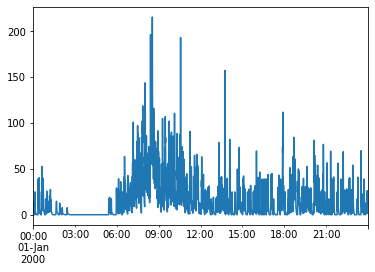

In [25]:
df = pd.DataFrame(processed, index=pd.date_range("2000-01-01", freq="10S", periods=8640))
df.sum(axis=1).plot()

In [29]:
df.sum(axis=1).sum() / 589

199.3620727822808

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8640 entries, 2000-01-01 00:00:00 to 2000-01-01 23:59:50
Freq: 10S
Columns: 589 entries, P58324 to P58912
dtypes: float64(589)
memory usage: 38.9 MB
